## DATA EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder

In [2]:
df=pd.read_csv('../Dataset/train.csv')

In [3]:
df.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    26298 non-null  int64 
 1   date      26298 non-null  object
 2   country   26298 non-null  object
 3   store     26298 non-null  object
 4   product   26298 non-null  object
 5   num_sold  26298 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.2+ MB


# Converte the date column to a datetime format

ALL DATE PREPRPCESSING

In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
d= df.sort_values(by="date")
d.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
17,17,2015-01-01,Sweden,KaggleRama,Kaggle Sticker,324
16,16,2015-01-01,Sweden,KaggleRama,Kaggle Hat,1195
15,15,2015-01-01,Sweden,KaggleRama,Kaggle Mug,706
14,14,2015-01-01,Sweden,KaggleMart,Kaggle Sticker,175


In [7]:
df['year'] = df['date'].dt.year
df

,row_id,date,country,store,product,num_sold,year
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,2015
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,2015
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,2015
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,2015
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,2015
...,...,...,...,...,...,...,...
26293,26293,2018-12-31,Sweden,KaggleMart,Kaggle Hat,823,2018
26294,26294,2018-12-31,Sweden,KaggleMart,Kaggle Sticker,250,2018
26295,26295,2018-12-31,Sweden,KaggleRama,Kaggle Mug,1004,2018
26296,26296,2018-12-31,Sweden,KaggleRama,Kaggle Hat,1441,2018


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    26298 non-null  int64         
 1   date      26298 non-null  datetime64[ns]
 2   country   26298 non-null  object        
 3   store     26298 non-null  object        
 4   product   26298 non-null  object        
 5   num_sold  26298 non-null  int64         
 6   year      26298 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(3)
memory usage: 1.3+ MB


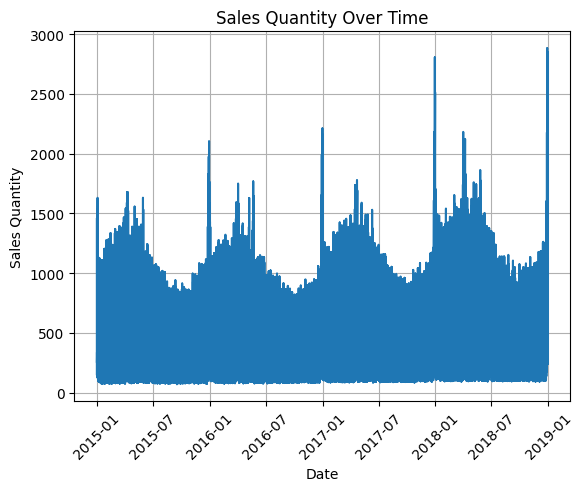

In [9]:

plt.plot(d["date"], d["num_sold"], linestyle='-')
plt.xlabel("Date")
plt.ylabel("Sales Quantity")
plt.title("Sales Quantity Over Time")
plt.xticks(rotation=45)  
plt.grid(True)


plt.show()

feature extraction

In [10]:
df["year"] = df["date"].dt.year
df["month"]= df["date"].dt.month
df["day"]= df["date"].dt.day
df['day_of_week'] = df['date'].dt.day_name()


In [11]:
df.head()

,row_id,date,country,store,product,num_sold,year,month,day,day_of_week
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,2015,1,1,Thursday
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,2015,1,1,Thursday
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,2015,1,1,Thursday
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,2015,1,1,Thursday
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,2015,1,1,Thursday


## number sold over 3 years

In [12]:
df.head()

,row_id,date,country,store,product,num_sold,year,month,day,day_of_week
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,2015,1,1,Thursday
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,2015,1,1,Thursday
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,2015,1,1,Thursday
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,2015,1,1,Thursday
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,2015,1,1,Thursday


In [13]:
sales_by_year = df.groupby("year")["num_sold"].sum().reset_index()
print(sales_by_year)

   year  num_sold
0  2015   2393991
1  2016   2403352
2  2017   2601797
3  2018   2792218


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18760\2354277545.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


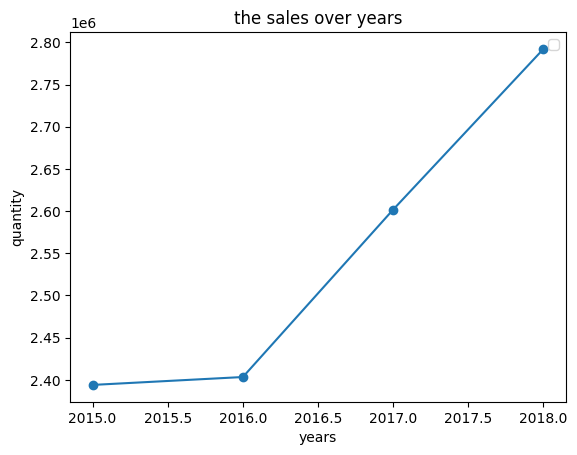

In [14]:
plt.plot(sales_by_year["year"],sales_by_year["num_sold"],marker='o')
plt.xlabel("years")
plt.ylabel("quantity")
plt.title("the sales over years")
plt.legend()
plt.show()

check correlation 

<Axes: >

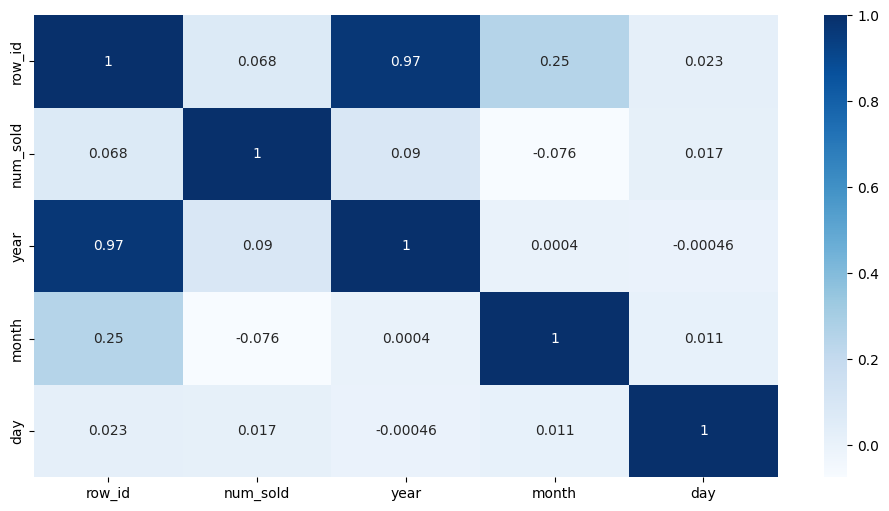

In [15]:
plt.figure(figsize=(12, 6))
corre=df.corr(numeric_only=True)
sns.heatmap(corre,annot=True,cmap="Blues")

## number sold in 12 months over 3 years

In [16]:
sales_by_month=df.groupby("month")["num_sold"].sum().reset_index()
sales_by_month

,month,num_sold
0,1,963734
1,2,832683
2,3,933878
3,4,951539
4,5,943429
5,6,823542
6,7,771935
7,8,732237
8,9,702257
9,10,743673


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18760\378736535.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


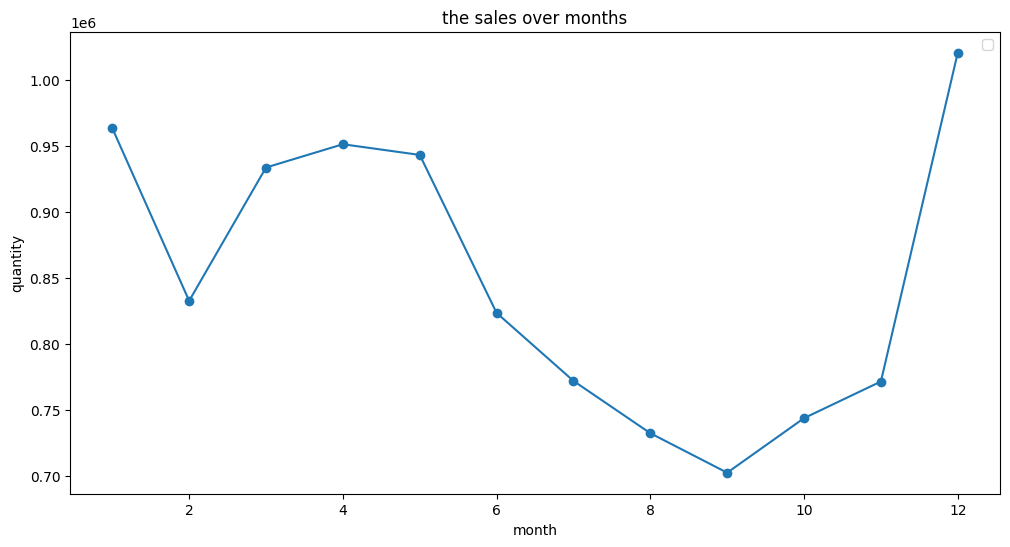

In [17]:
plt.figure(figsize=(12,6))
plt.plot(sales_by_month["month"],sales_by_month["num_sold"],marker='o')
plt.xlabel("month")
plt.ylabel("quantity")
plt.title("the sales over months")
plt.legend()
plt.show()

## number sold in 30 days over 3 years

In [18]:

sales_by_day=df.groupby("day")["num_sold"].sum().reset_index()
sales_by_day

,day,num_sold
0,1,346584
1,2,337359
2,3,338334
3,4,338579
4,5,333936
5,6,335147
6,7,336540
7,8,335590
8,9,331533
9,10,334556


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18760\1943949579.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


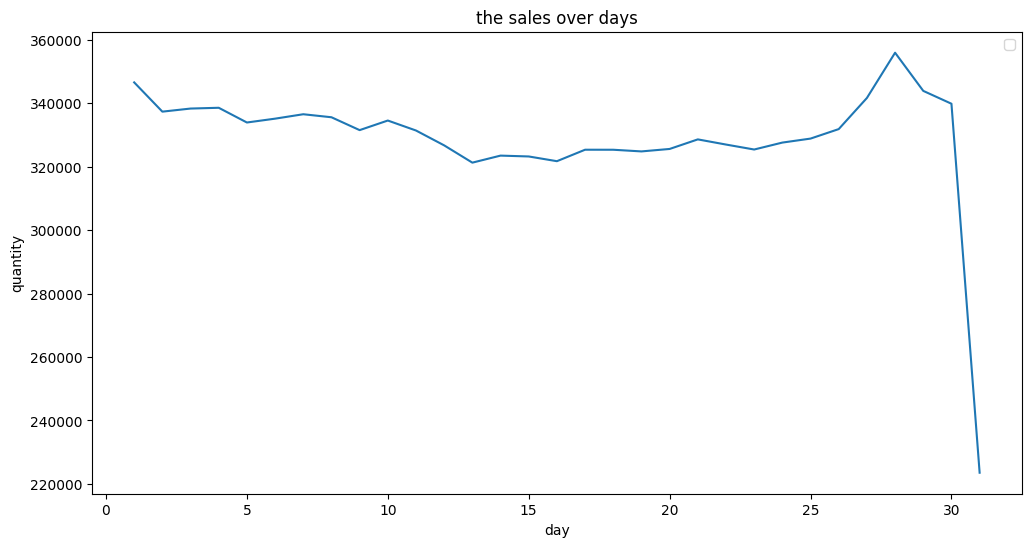

In [19]:
plt.figure(figsize=(12,6))
plt.plot(sales_by_day["day"],sales_by_day["num_sold"])
plt.xlabel("day")
plt.ylabel("quantity")
plt.title("the sales over days")
plt.legend()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18760\137792000.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


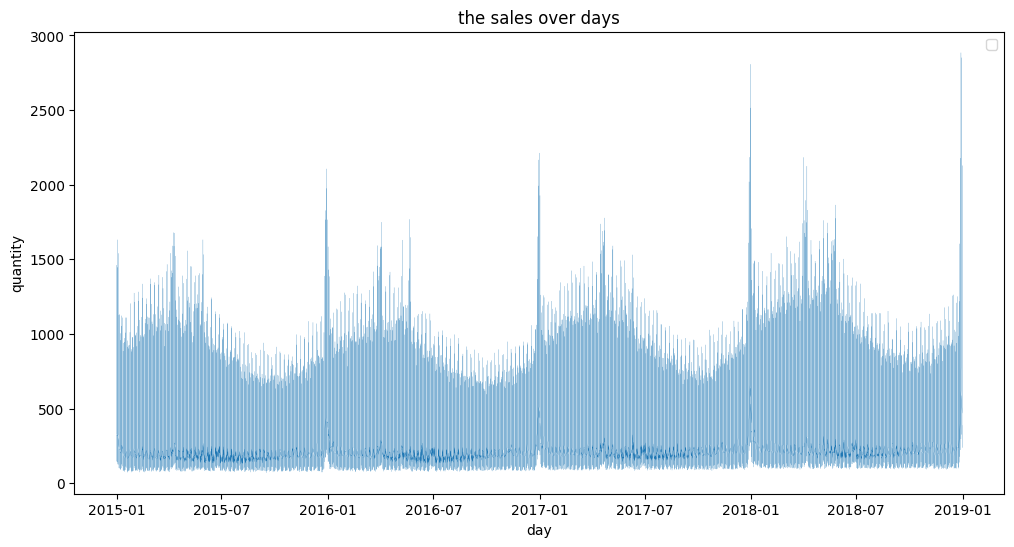

In [20]:
plt.figure(figsize=(12,6))
plt.plot(df["date"],df["num_sold"],linewidth=0.1)
plt.xlabel("day")
plt.ylabel("quantity")
plt.title("the sales over days")
plt.legend()
plt.show()

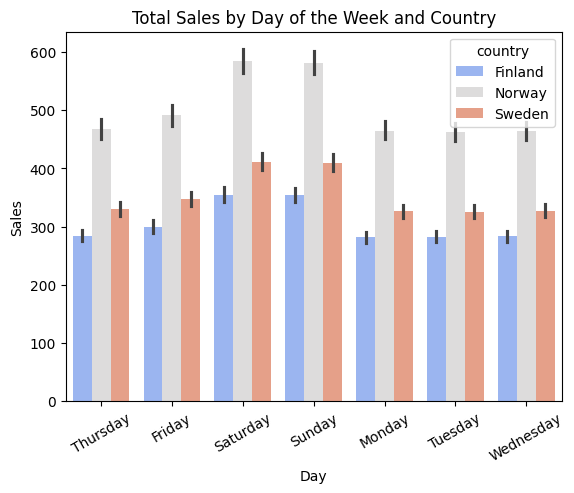

In [21]:
sns.barplot(x='day_of_week',y='num_sold',hue='country',data=df,palette='coolwarm')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.title('Total Sales by Day of the Week and Country')
plt.xticks(rotation=30)
plt.show()

## data distribution in 2015

In [22]:
data_2015=df[df["date"].dt.year==2015][["date","num_sold"]]

data_2015.head()

,date,num_sold
0,2015-01-01,329
1,2015-01-01,520
2,2015-01-01,146
3,2015-01-01,572
4,2015-01-01,911


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18760\3021546742.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


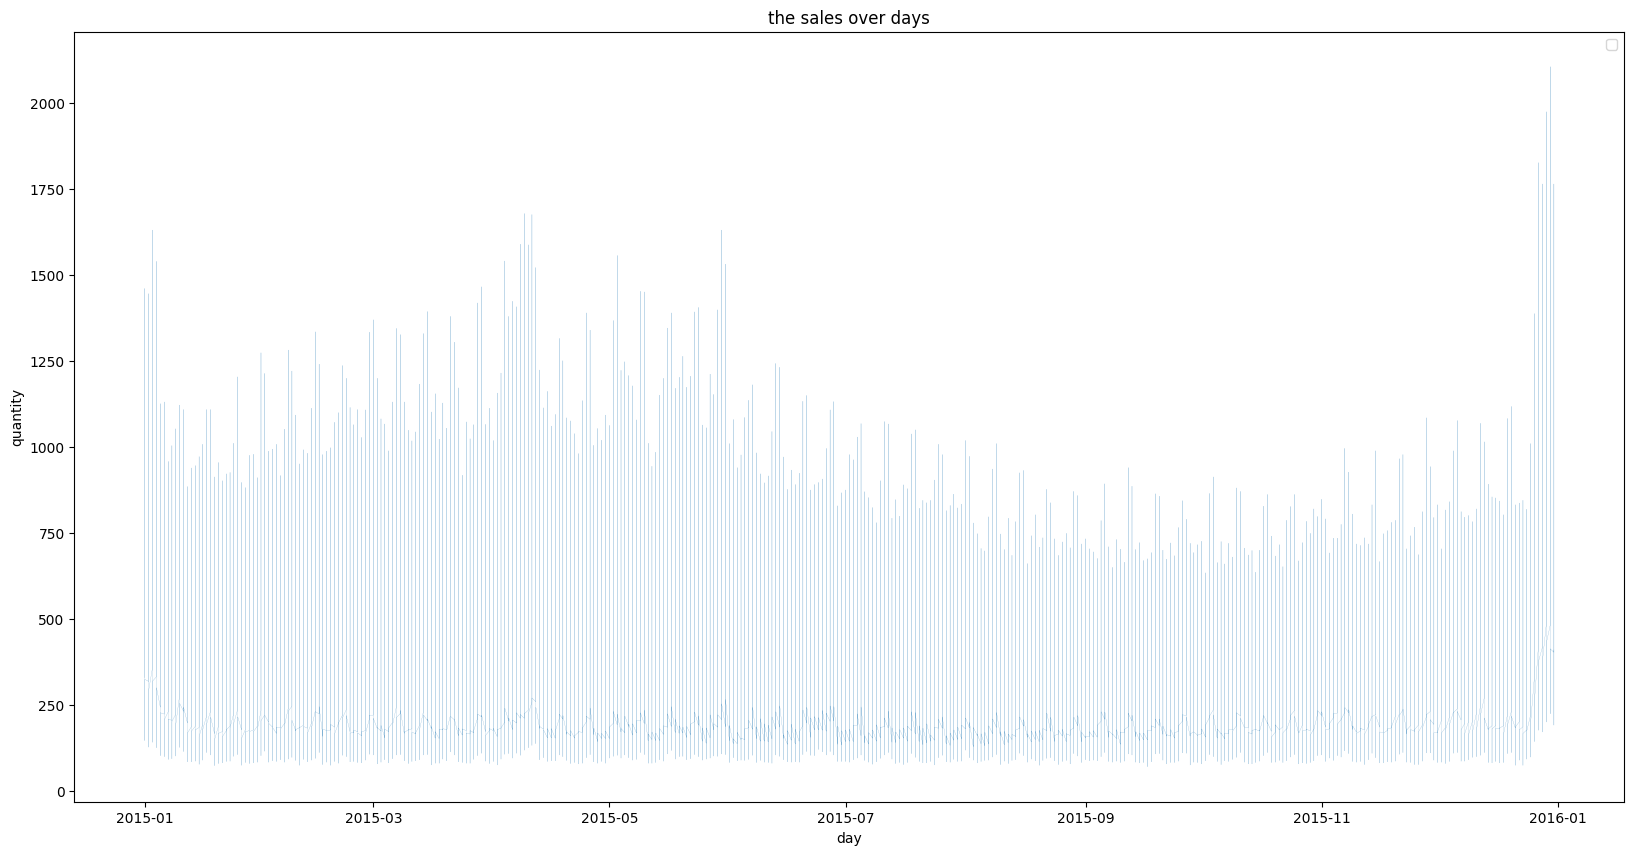

In [23]:
plt.figure(figsize=(20,10))
plt.plot(data_2015["date"],data_2015["num_sold"],linewidth=0.1)
plt.xlabel("day")
plt.ylabel("quantity")
plt.title("the sales over days")
plt.legend()
plt.show()

## data distribution in 2016

In [24]:
data_2016=df[df["date"].dt.year==2016][["date","num_sold"]]

data_2016.head()

,date,num_sold
6570,2016-01-01,370
6571,2016-01-01,523
6572,2016-01-01,143
6573,2016-01-01,618
6574,2016-01-01,995


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18760\2362963601.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


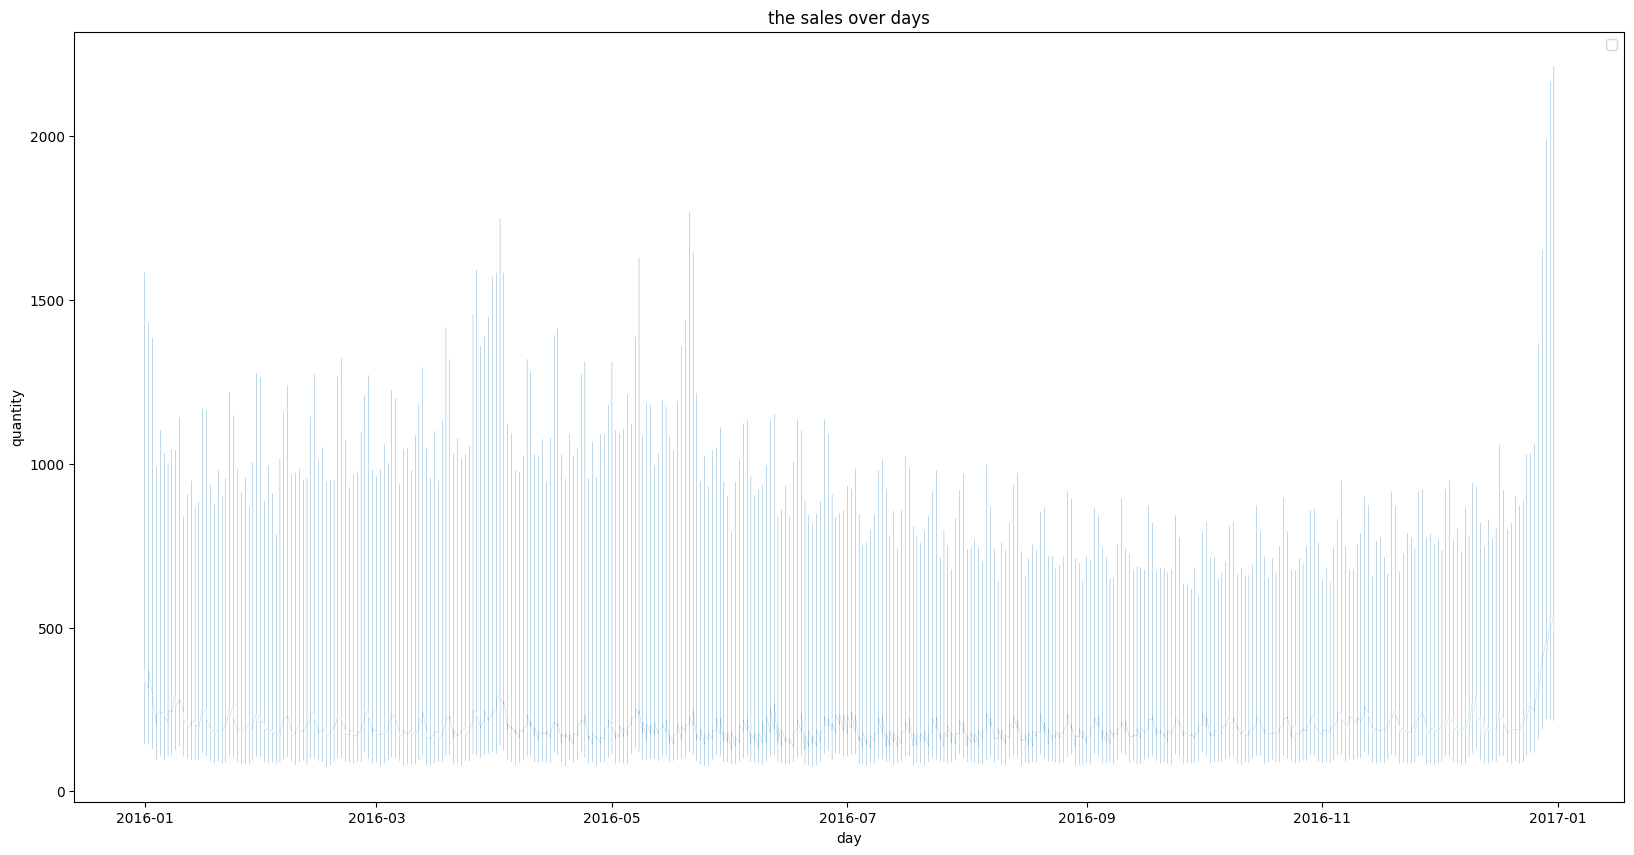

In [25]:
plt.figure(figsize=(20,10))
plt.plot(data_2016["date"],data_2016["num_sold"],linewidth=0.1)
plt.xlabel("day")
plt.ylabel("quantity")
plt.title("the sales over days")
plt.legend()
plt.show()

## data distribution in 2017

In [26]:
data_2017=df[df["date"].dt.year==2017][["date","num_sold"]]

data_2017.head()

,date,num_sold
13158,2017-01-01,436
13159,2017-01-01,729
13160,2017-01-01,188
13161,2017-01-01,747
13162,2017-01-01,1186


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18760\1800898419.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


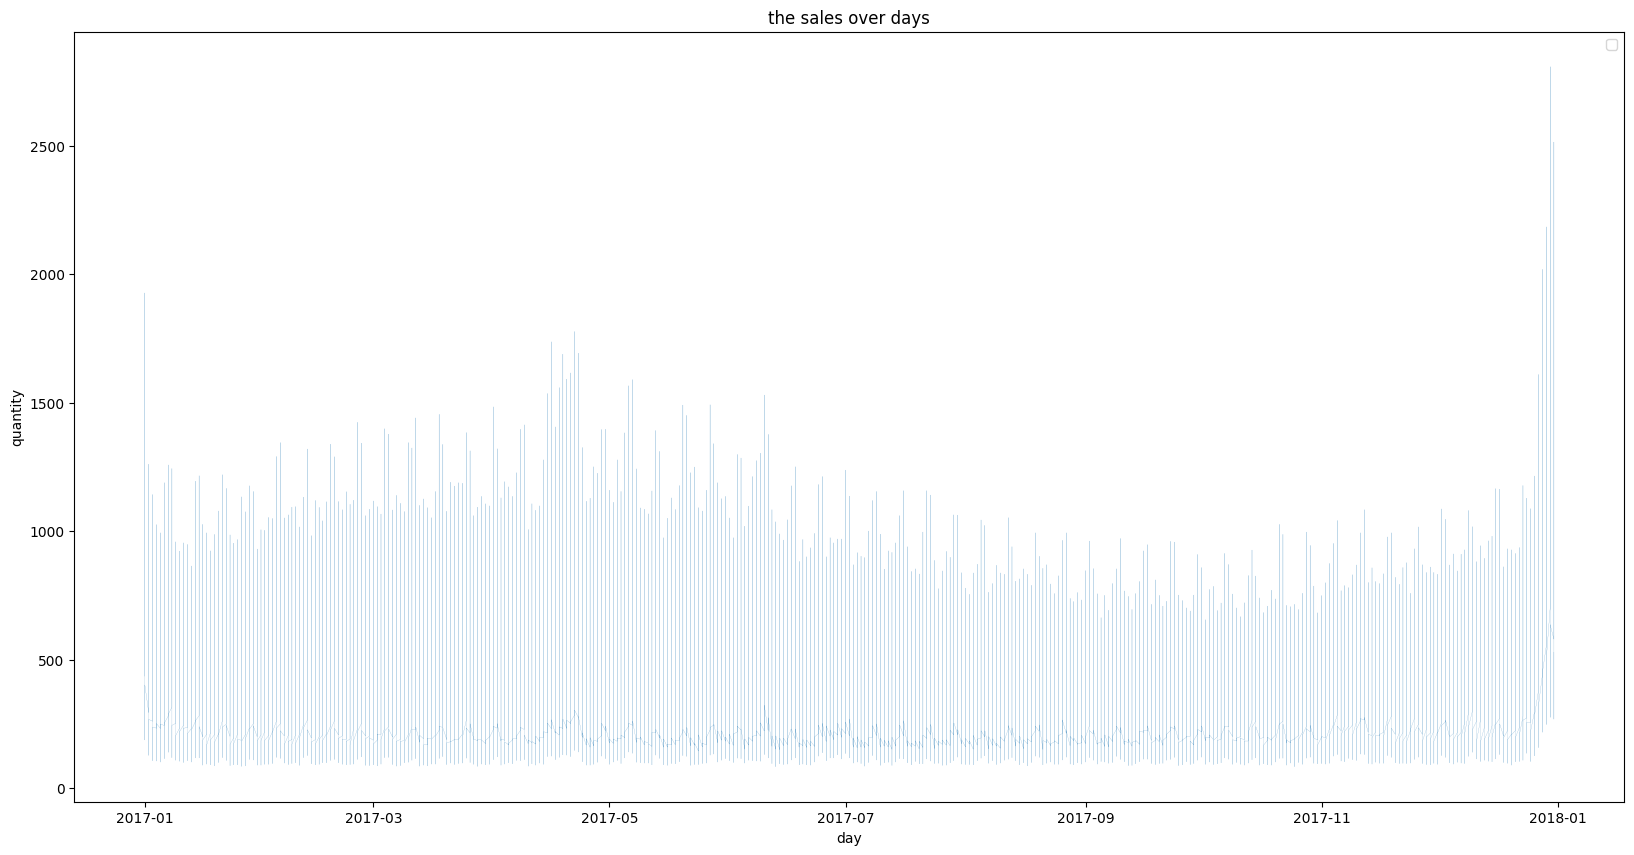

In [27]:
plt.figure(figsize=(20,10))
plt.plot(data_2017["date"],data_2017["num_sold"],linewidth=0.1)
plt.xlabel("day")
plt.ylabel("quantity")
plt.title("the sales over days")
plt.legend()
plt.show()

## data distribution in 2018

In [28]:
data_2018=df[df["date"].dt.year==2018][["date","num_sold"]]

data_2018.head()

,date,num_sold
19728,2018-01-01,405
19729,2018-01-01,621
19730,2018-01-01,176
19731,2018-01-01,714
19732,2018-01-01,1043


C:\Users\Administrator\AppData\Local\Temp\ipykernel_18760\391723753.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


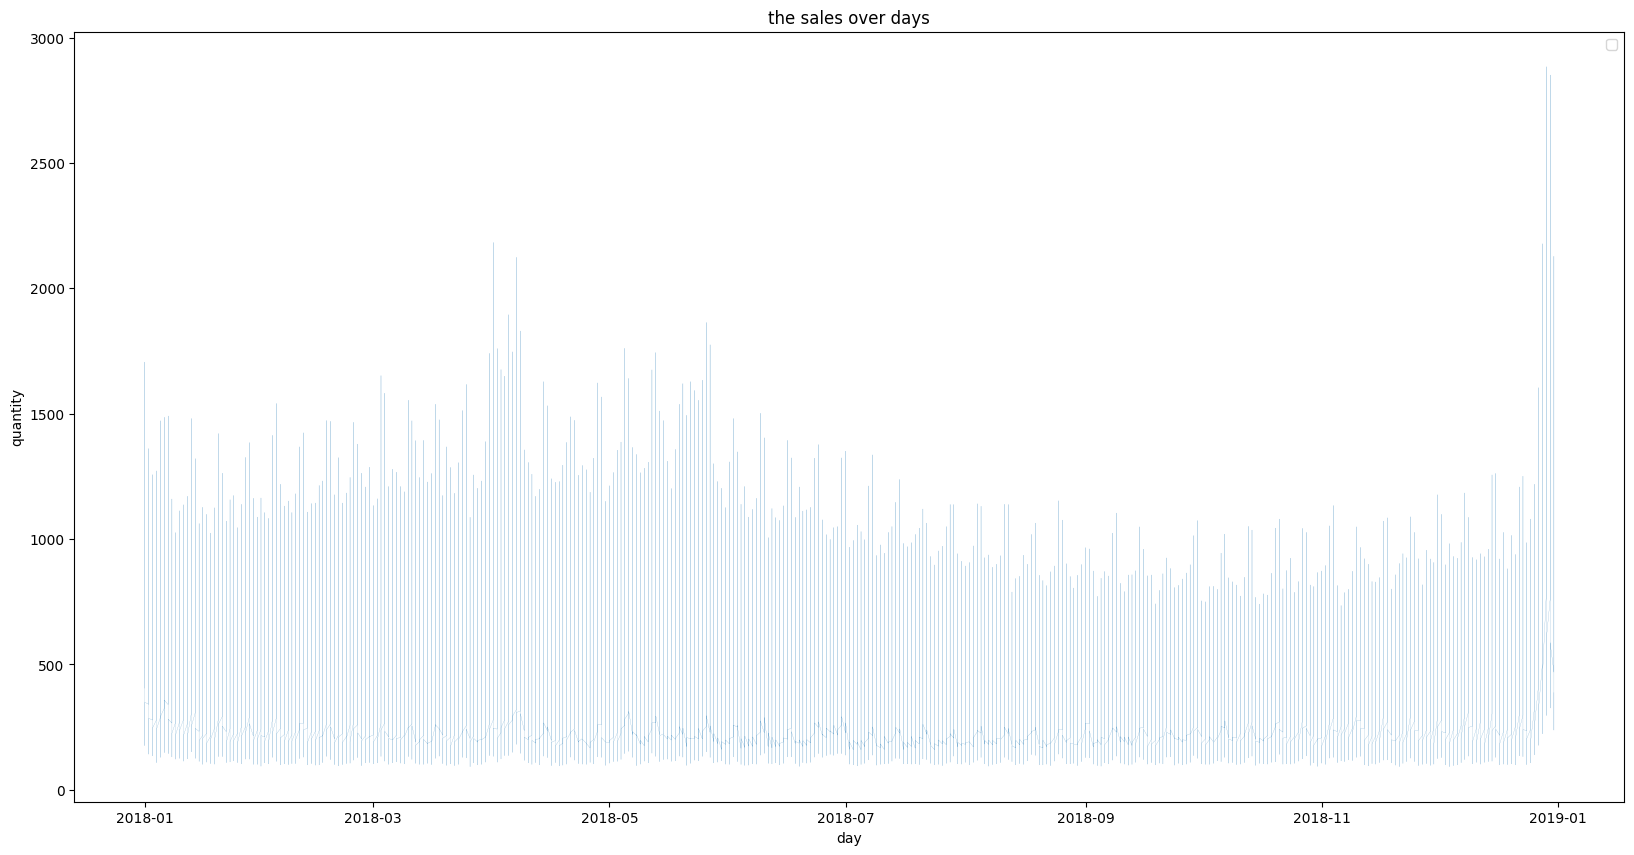

In [29]:
plt.figure(figsize=(20,10))
plt.plot(data_2018["date"],data_2018["num_sold"],linewidth=0.1)
plt.xlabel("day")
plt.ylabel("quantity")
plt.title("the sales over days")
plt.legend()
plt.show()

## finish over years 

In [30]:
df.head()

,row_id,date,country,store,product,num_sold,year,month,day,day_of_week
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,2015,1,1,Thursday
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,2015,1,1,Thursday
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,2015,1,1,Thursday
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,2015,1,1,Thursday
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,2015,1,1,Thursday


In [31]:
df["country"].unique()

array(['Finland', 'Norway', 'Sweden'], dtype=object)

## number of sold over country 

In [32]:
num_over_country=df.groupby("country")["num_sold"].sum().reset_index()
num_over_country


,country,num_sold
0,Finland,2680927
1,Norway,4404706
2,Sweden,3105725


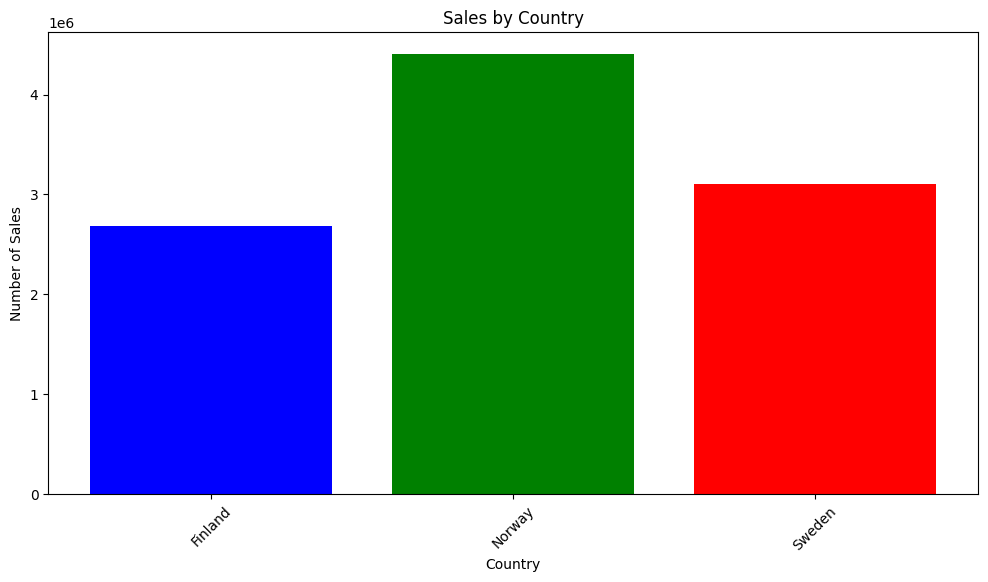

In [33]:
plt.figure(figsize=(12,6))
plt.bar(num_over_country["country"],num_over_country["num_sold"], color=["blue", "green", "red"])
plt.xlabel("Country")
plt.ylabel("Number of Sales")
plt.title("Sales by Country")

plt.xticks(rotation=45)

plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18760\1934064653.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='num_sold',data=df,palette='coolwarm')


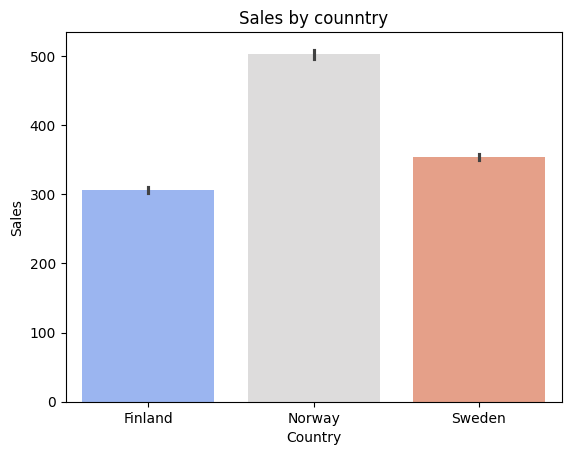

In [34]:
sns.barplot(x='country', y='num_sold',data=df,palette='coolwarm')
plt.xlabel('Country')
plt.ylabel('Sales')
plt.title('Sales by counntry')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18760\3610437075.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='country', y='num_sold', data=df,palette='coolwarm')


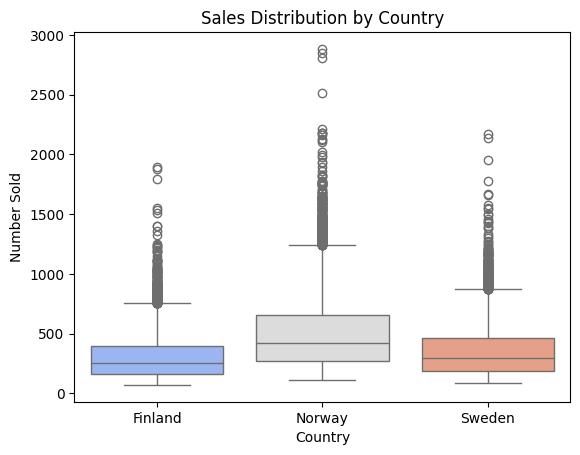

In [35]:
sns.boxplot(x='country', y='num_sold', data=df,palette='coolwarm')
plt.title('Sales Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number Sold')
plt.show()

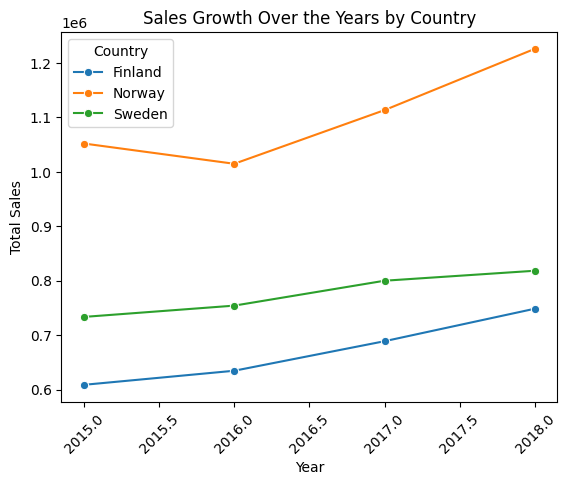

In [36]:
df_yearly = df.groupby(['year', 'country'])['num_sold'].sum().reset_index()
sns.lineplot(x='year',y='num_sold',hue='country',data=df_yearly,marker='o')
plt.title('Sales Growth Over the Years by Country')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.show()

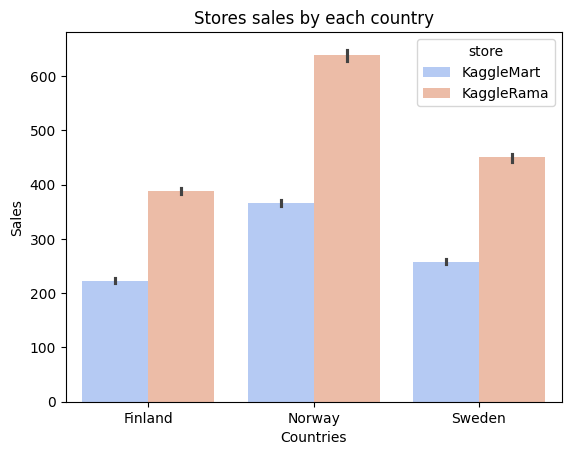

In [37]:
sns.barplot(x='country',y='num_sold',hue='store',data=df,palette='coolwarm')
plt.xlabel('Countries')
plt.ylabel('Sales')
plt.title('Stores sales by each country')
plt.show()

# check missing values

In [38]:
df.isna().sum()

row_id         0
date           0
country        0
store          0
product        0
num_sold       0
year           0
month          0
day            0
day_of_week    0
dtype: int64

In [39]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
row_id,26298.0,13148.5,0.0,6574.25,13148.5,19722.75,26297.0,7591.723026
date,26298,2016-12-31 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00,2016-12-31 00:00:00,2017-12-31 00:00:00,2018-12-31 00:00:00,NaN
num_sold,26298.0,387.533577,70.0,190.0,315.0,510.0,2884.0,266.076193
year,26298.0,2016.499658,2015.0,2016.0,2016.0,2017.0,2018.0,1.117749
month,26298.0,6.52293,1.0,4.0,7.0,10.0,12.0,3.448769
day,26298.0,15.729637,1.0,8.0,16.0,23.0,31.0,8.800259


# Detect outliers

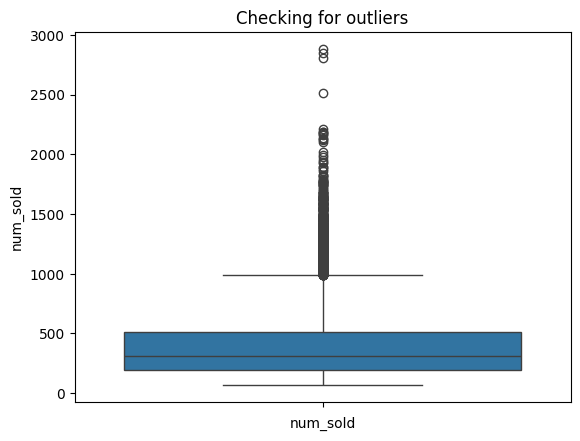

In [40]:

sns.boxplot(df['num_sold'])
plt.title('Checking for outliers')
plt.xlabel("num_sold")
plt.show()

### Outliers removal

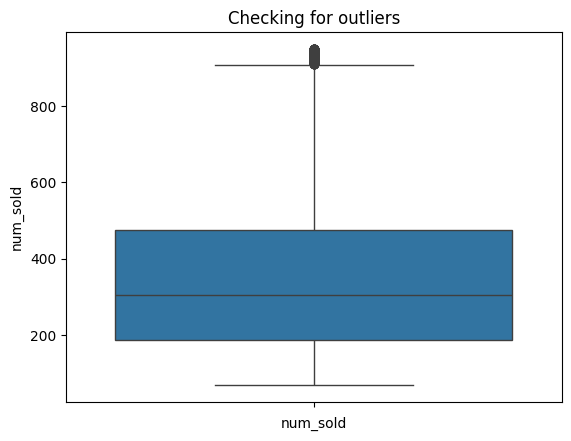

In [41]:
df=df[df['num_sold']< 950]
sns.boxplot(df['num_sold'])
plt.title('Checking for outliers')
plt.xlabel("num_sold")
plt.show()

In [42]:
df.shape

(25163, 10)

## stores

In [43]:
df.head()

,row_id,date,country,store,product,num_sold,year,month,day,day_of_week
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,2015,1,1,Thursday
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,2015,1,1,Thursday
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,2015,1,1,Thursday
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,2015,1,1,Thursday
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,2015,1,1,Thursday


In [44]:
num_over_store=df.groupby("store")["num_sold"].sum().reset_index()
num_over_store


,store,num_sold
0,KaggleMart,3654543
1,KaggleRama,5189107


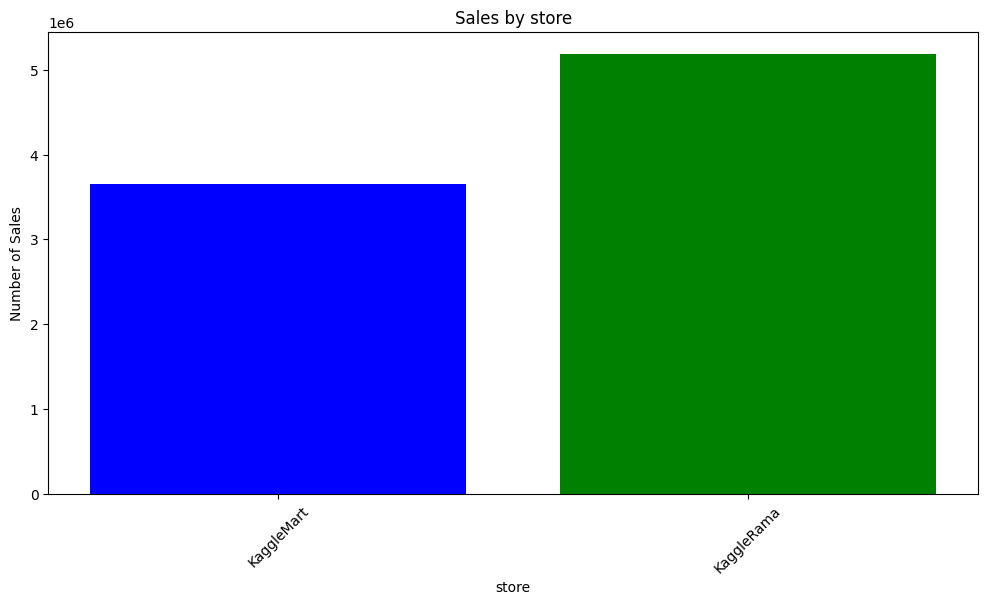

In [45]:
plt.figure(figsize=(12,6))
plt.bar(num_over_store["store"],num_over_store["num_sold"], color=["blue", "green", "red"])
plt.xlabel("store")
plt.ylabel("Number of Sales")
plt.title("Sales by store")

plt.xticks(rotation=45)

plt.show()

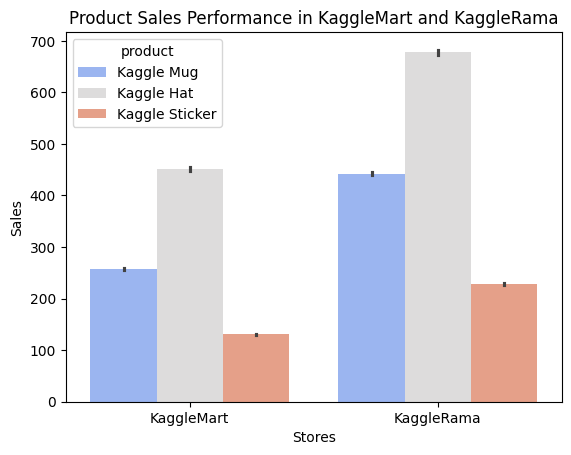

In [46]:
sns.barplot(x='store',y='num_sold',hue='product',data=df,palette='coolwarm')
plt.xlabel('Stores')
plt.ylabel('Sales')
plt.title('Product Sales Performance in KaggleMart and KaggleRama')
plt.show()

In [49]:
# Save processed data to CSV
df.to_csv(r'g:\projects\Sales-Forecasting-and-Optimization\Dataset\data_after_EDA.csv', index=False)